In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/MyDrive/Project & Research /ISCAS/Clean Datased/BOW_sim_data.csv'
data=pd.read_csv(path)

In [ ]:
data=data.drop(columns=["Unnamed: 0"],axis=1)

KeyError: ignored

In [ ]:
data

,description_x,description_y,same_security,Check,"(Dx,Dy)",Cos_similarity,Eucidean distance,e^(-distance),Min_Max_similarity
0,first trust dow jones internet,first trust dj internet idx,True,1,"['first trust dow jones internet', 'first trus...",0.600000,2.000000,0.135335,0.428571
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,True,1,"['schwab intl large company index etf', 'schwa...",0.680414,2.236068,0.106878,0.500000
2,vanguard small cap index adm,vanguard small-cap index fund inst,False,0,"['vanguard small cap index adm', 'vanguard sma...",0.730297,1.732051,0.176921,0.571429
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,True,1,['duke energy corp new com new isin #us4 sedol...,0.833333,2.000000,0.135335,0.666667
4,visa inc class a,visa inc.,True,1,"['visa inc class a', 'visa inc.']",0.816497,1.000000,0.367879,0.666667
...,...,...,...,...,...,...,...,...,...
2137,delta air lines inc com,delta air lines inc dela new,True,1,"['delta air lines inc com', 'delta air lines i...",0.730297,1.732051,0.176921,0.571429
2138,cognizant tech solutns a,cognizant tech solutions corp,True,1,"['cognizant tech solutns a', 'cognizant tech s...",0.577350,1.732051,0.176921,0.400000
2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,False,0,['pimco investment grade corporate bond fund -...,0.338062,2.828427,0.059106,0.200000
2140,eli lilly & co com,lilly eli &co com npv,True,1,"['eli lilly & co com', 'lilly eli &co com npv']",0.894427,1.000000,0.367879,0.800000


In [ ]:
data.describe()

,Check,Cos_similarity,Eucidean distance,e^(-distance)
count,2142.000000,2142.000000,2142.000000,2142.000000
mean,0.753035,0.578507,1.944462,0.186736
std,0.431347,0.235390,0.723025,0.161536
min,0.000000,0.000000,0.000000,0.016194
25%,1.000000,0.408248,1.414214,0.086338
50%,1.000000,0.612372,2.000000,0.135335
75%,1.000000,0.755929,2.449490,0.243117
max,1.000000,1.000000,4.123106,1.000000


In [ ]:
# Seperating the similarity values in table
CS_data=data[['Check','(Dx,Dy)','Cos_similarity']].copy()
Sh_data=data[['Check','(Dx,Dy)','e^(-distance)']].copy()

In [ ]:
Sh_data

,Check,"(Dx,Dy)",e^(-distance)
0,1,"['gopro inc class a', 'gopro inc-class a']",1.000000
1,1,"['meridian bioscience inc', 'meridian bioscien...",1.000000
2,1,"['time warner inc.', 'time warner inc']",1.000000
3,1,"['vanguard institutional index i', 'vanguard i...",1.000000
4,1,"['amazon.com inc', 'amazon.com inc.']",1.000000
...,...,...,...
2137,1,"['oppenheimer developing markets y fund', 'opp...",0.070952
2138,0,"['vanguard short term bond index investor', 'v...",0.031301
2139,0,"['metwest tot rtn bd m', 'metropolitan west fd...",0.042329
2140,0,"['vang tot bd mk is pl', 'vanguard total bond ...",0.031301


In [ ]:
CS_data

,Check,"(Dx,Dy)",Cos_similarity
0,1,"['gopro inc class a', 'gopro inc-class a']",1.0
1,1,"['meridian bioscience inc', 'meridian bioscien...",1.0
2,1,"['time warner inc.', 'time warner inc']",1.0
3,1,"['vanguard institutional index i', 'vanguard i...",1.0
4,1,"['amazon.com inc', 'amazon.com inc.']",1.0
...,...,...,...
2137,1,"['oppenheimer developing markets y fund', 'opp...",0.0
2138,0,"['vanguard short term bond index investor', 'v...",0.0
2139,0,"['metwest tot rtn bd m', 'metropolitan west fd...",0.0
2140,0,"['vang tot bd mk is pl', 'vanguard total bond ...",0.0


Preprocessing and graphs 


<Figure size 1440x720 with 0 Axes>

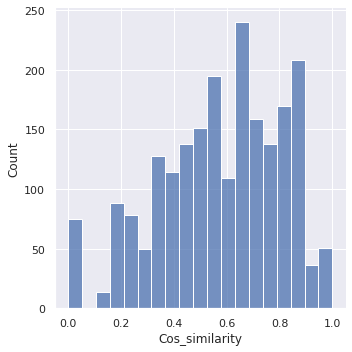

In [ ]:
plt.figure(figsize=(20,10))
display=sns.displot(CS_data,x='Cos_similarity',fill=True,palette='coolwarm')
plt.show(display)

<Figure size 1080x720 with 0 Axes>

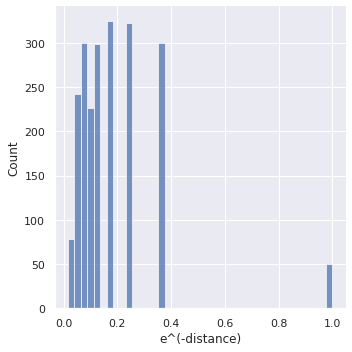

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(Sh_data,x='e^(-distance)',fill=True,palette='afmhot')
plt.show()

In [ ]:
# nomalizing the the similarities

# libraries for preprocessing 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#C=A[np.newaxis,:] # add dimensions 
#D = np.squeeze(D) # reducing dimensions 

In [ ]:
X=CS_data['Cos_similarity']
y=CS_data['Check']

In [ ]:
X

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2137    0.0
2138    0.0
2139    0.0
2140    0.0
2141    0.0
Name: Cos_similarity, Length: 2142, dtype: float64

In [ ]:
X1=X[np.newaxis,:]
y1=y[np.newaxis,:]
X1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


(1, 2142)

In [ ]:
X1=X1.reshape(-1,1)
y1=y1.reshape(-1,1)
X1.shape

(2142, 1)

In [ ]:
X1 =StandardScaler().fit(X1).transform(X1.astype(float))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.2, random_state=4)

In [ ]:
print(X_train.ndim)

2


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.745920745920746


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
